# Milikan Oil Drop Experiment

###### Nathaniel Flower and Chelsey McMichael

# Abstract


In this experiment, we measured the charge of an electron through the Milikan oil-drop experiment. The charge what determined to be -1.4224262805074012*10^-19 C. Compared to the anaytical value of the charge, there was a percent difference of 11.209345786054856%.

# Introduction

In 1909, Robert A. Milikan determined the fundamental charge e through the Milikan oil-drop experiment because each individual oil drop had a balanced electric and gravitational force. Milikan wanted to determine whether electrical charges occurred in discrete units, once he determined this to be fact, he determined the value of the elementary charge. This experiment followed the original setup, with a few minor changes.  

# Procedure

In this experiment, we substituted latex spheres in the place of the oil drops of the original apparatus. These latex spheres travel through the latex spray hole and these spheres are charged moving vertically between two metal plates. To view these spheres, we had to observe them through the microscope as the illuminator shined through the light beam opening to illuminate the spheres. 

<img src="./assets/device.jpg">
###### Figure 1. Milikan Oil-Drop Apparatus

When the 300 V voltage was not applied, the polarity reversing switch was off in the midposition. We observed the spheres free falling and recorded the time it took for a sphere to free fall betweem two segments under the force of gravity. When the voltage was turned on, we switched the polarity reversing switch either up or down to make the sphere rise or fall with an added electric force. The time taken for a sphere to rise or fall was also recorded. Recording this information allows us to calculate the charge of the particle. In total, there was 91 trials in which we tried to record the rise and fall times, as well as the free fall time. 

<img src="./assets/inside.jpg">
###### Figure 2. Latex Spheres Travelling Between 0.05 mm Segments

Instead of using a conventional stopwatch, we just wrote code to use our laptops timer to get more precision in our measurement. The code we used:<br>
```python
import time

cont = 'y'
while cont != 'n':
    start = time.time()
    input("Stop: ")
    end = time.time()
    print(end - start)
    cont = input("Again: ")
```

# Data

**Trial**|**Rise**|**Fall**|**Free Fall**
:-----:|:-----:|:-----:|:-----:
1| | |8.212843895
2| | |10.89744306
3| | |2.856066942
4|2.432384729| | 
5|1.66163516| | 
6| | |7.881625175
7| | |1.738971472
8| | |14.39264631
9| | |1.713270664
10| |1.79573369| 
11|1.01055789| | 
12|2.523465633| | 
13|1.455188513| | 
14| | |9.472488403
15| | |10.55353975
16|1.959552526| | 
17| |0.897855282| 
18|0.974456072| | 
19|1.599865675| | 
20| |1.058858633| 
21| | |3.874842167
22| |0.538098097| 
23| | |2.326050282
24|1.210013866| | 
25| | |1.782615185
26| |0.994503975| 
27|1.645473957| | 
28| |0.83839488| 
29|1.223428249| | 
30| | |3.618525267
31|0.400490284|0.770166636| 
32|0.331391335|0.616934538| 
33| |0.532225847| 
34|0.169258833|0.316095591| 
35|0.847942829| | 
36|1.169527054| | 
37|0.884941578|0.96906352| 
38| |0.938575268| 
39|1.105657101|1.454652786| 
40| |1.101102591| 
41| |5.906097889| 
42| |0.454192638| 
43| |2.631916285| 
44|0.904268742|0.684141159| 
45|2.124335766|2.101639748| 
46| |0.970880985| 
47|1.399701118|0.969271898| 
48| |0.700464964| 
49|1.387429237|0.716257572| 
50| |0.716619015| 
51| |1.229087591| 
52|0.984875917|0.801284075| 
53|1.070526361|1.216011047| 
54|1.03263998| | 
55| |1.470393419| 
56| |0.798036814| 
57|1.602308035|1.200989723| 
58|1.580104828|0.717149973| 
59| |0.936168671| 
60|0.831620693|0.654384375| 
61| |0.96446991| 
62|0.81596303|0.816253662| 
63|1.647096872|1.601362705| 
64|1.400588512|1.285666943| 
65|1.325311184|0.762620449| 
66|1.564141512|1.839228392| 
67|1.148337126|0.838251591| 
68|1.269977331|0.88106966| 
69|0.647604942|0.604474545| 
70|2.523132086|2.218057394| 
71|1.255136728|1.237900972| 
72|0.949555159|1.251529694| 
73|1.154421806|0.970658064| 
74|0.485418081|0.600871086| 
75|0.919658899|0.753614664| 
76|0.922494173|0.854334593| 
77|2.234569073|1.163942575| 
78|1.38589263|1.217462301| 
79|1.05444479| | 
80|0.93244338|0.854021311| 
81|1.400674105|0.953438759| 
82|1.232452631|0.685162783| 
83|1.451907635|0.969392776| 
84|1.070380449|1.353893518| 
85|1.148137331|0.884811401| 
86|1.201933622|0.754033804| 
87|1.185611486|0.731754541| 
88| |1.14837122| 
89|1.701943398|1.369336843| 
90|0.963834286|0.762876511| 
91|1.001801968|0.800737619| 
###### Figure 3. Time Trials of Latex Sphere Fall and Rise Times

# Calculations

The equation we will be using is from the Operating Instructions handout:

\begin{equation}
f(v) = e = 3\pi\eta r \frac{Dv}{V}
\end{equation}

In [11]:
import math
from astropy.io import ascii
import numpy as np
from scipy.stats import expon
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

ACCEPTED_CHARGE = -1.602e-19

def f(velocity_step): # equation (1)
    eta = 1.8e-5
    radius = 5.5e-7
    voltage = 300
    distance_between_plates = 5e-3
    return 3*math.pi*eta*radius*distance_between_plates*velocity_step/voltage 


In [34]:
raw = ascii.read("oildrop_data_nf_cm.csv")
raw['Rise'].fill_value = 0
raw['Fall'].fill_value = 0
filled = raw.filled()
data = []
distance = .05 /1000
for i in range(len(filled['Fall'])):
    if filled['Fall'][i] and filled['Rise'][i]:
        val = distance/filled['Fall'][i] - distance/filled['Rise'][i]
        if val <= 0:
            data.append(val)


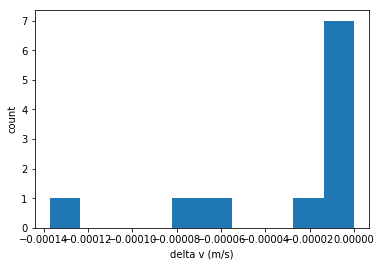

Basic charge calculation: -4.7417213836053054e-20 C
Slightly more sophisticated charge calculation: -4.267278841522206e-20 C


Percent error for basic calculation: -70.40123980271346%
Percent error for slightly more sophisticated calculation: -73.36280373581644%


In [41]:
a=plt.hist(data, histtype='stepfilled')
avg_fall = sum(data)/len(data)
basic = f(avg_fall)
plt.xlabel("delta v (m/s)")
plt.ylabel("count")
plt.show()
print("Basic charge calculation: {} C".format(basic))
temp = []
val = []
for t in range(len(a[0]-1)):
    val.append(a[1][t] + (a[1][t] + a[1][t+1])/2)

for j in range(0, len(val)//2, 2):
    temp.append(f(val[j]-val[j+1]))
avg_soph = sum(temp)/len(temp)
print("Slightly more sophisticated charge calculation: {} C\n\n".format(avg_soph))
print("Percent error for basic calculation: {}%".format(abs(basic - ACCEPTED_CHARGE)/ACCEPTED_CHARGE*100))
print("Percent error for slightly more sophisticated calculation: {}%".format(abs(avg_soph - ACCEPTED_CHARGE)/ACCEPTED_CHARGE*100))

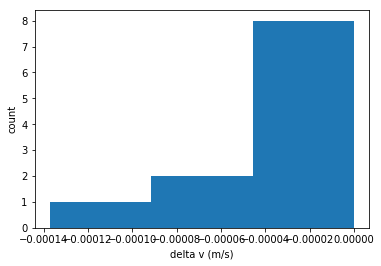

Basic charge calculation: -4.7417213836053054e-20 C
Slightly more sophisticated charge calculation: -1.4224262805074012e-19 C


Percent error for basic calculation: -70.40123980271346%
Percent error for slightly more sophisticated calculation: -11.209345786054856%


In [40]:
a=plt.hist(data, histtype='stepfilled', bins=3)
avg_fall = sum(data)/len(data)
basic = f(avg_fall)
plt.xlabel("delta v (m/s)")
plt.ylabel("count")
plt.show()
print("Basic charge calculation: {} C".format(basic))
temp = []
val = []
for t in range(len(a[0]-1)):
    val.append(a[1][t] + (a[1][t] + a[1][t+1])/2)

for j in range(0, len(val)//2, 2):
    temp.append(f(val[j]-val[j+1]))
avg_soph = sum(temp)/len(temp)
print("Slightly more sophisticated charge calculation: {} C\n\n".format(avg_soph))
print("Percent error for basic calculation: {}%".format(abs(basic - ACCEPTED_CHARGE)/ACCEPTED_CHARGE*100))
print("Percent error for slightly more sophisticated calculation: {}%".format(abs(avg_soph - ACCEPTED_CHARGE)/ACCEPTED_CHARGE*100))

# Conclusion

We calculated the charge of an electron to be -1.422x10^-19 C which is off by about 11% of the accepted value of -1.602x10^-19 C. Our data was sorely lacking for our calculations with only 11 data points remaining of our 91 initial points. All other points had some sort of error in the recording of the data. Most of them were lacking a measurement and of the remaining, there was an error in measuring the time. The latex spheres are supposed to be at their terminal velocity which means that it should not be possible for the rise time to be greater than the fall time. After excluding those points and plotting a histogram, we saw that we had three distinct groupings. We hard coded the number of bins to three to help account for the gaps in our data.

# References

Operating Instructions Manual 

Milikan Apparatus Model TM-15 Instruction Manual

Serway, R. A., Moses, C. J., & Moyer, C. A. (2004). Modern Physics (3rd ed.). 